In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [393]:
d= pd.read_csv(r'D:\internfolder\insurance.csv')
d

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [394]:
d.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [395]:
d=d.drop(["_c39"],axis=1)
d

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [396]:
d.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [397]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:>

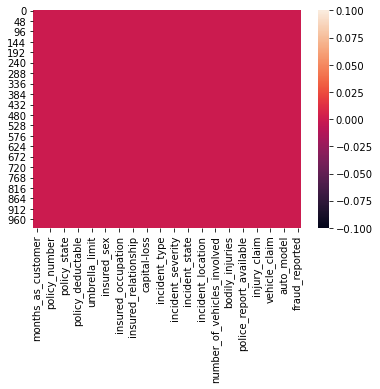

In [398]:
sns.heatmap(d.isnull())

# Data Visualization

(array([0, 1]), [Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')])

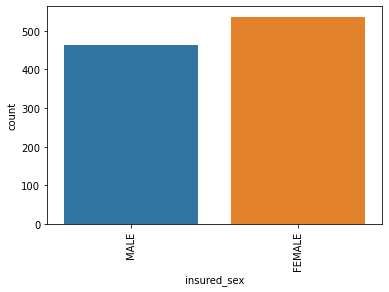

In [399]:
sns.countplot(x='insured_sex',data=d)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

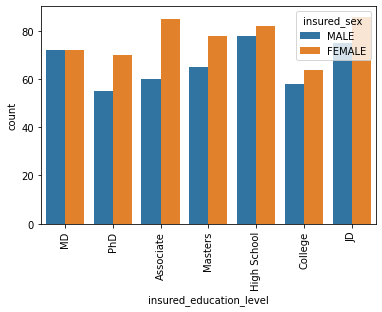

In [400]:
sns.countplot(x="insured_education_level",hue='insured_sex',data=d)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

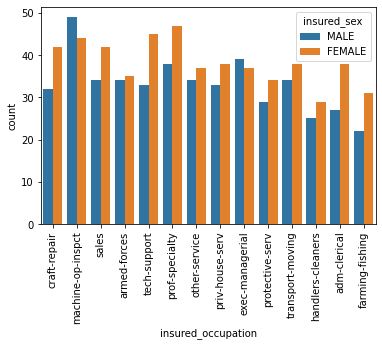

In [401]:
sns.countplot(x="insured_occupation",hue='insured_sex',data=d)

plt.xticks(rotation=90)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

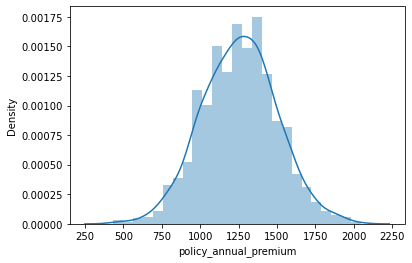

In [402]:
sns.distplot(d["policy_annual_premium"])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

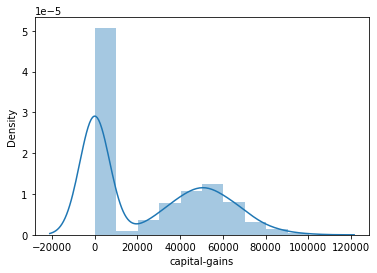

In [403]:
sns.distplot(d["capital-gains"])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

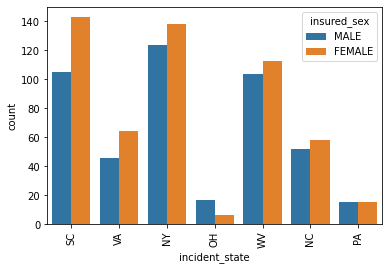

In [404]:
sns.countplot(x="incident_state",hue='insured_sex',data=d)

plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

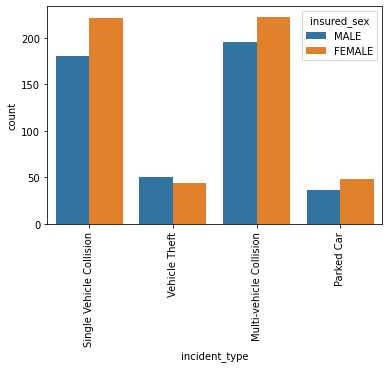

In [405]:
sns.countplot(x="incident_type",hue='insured_sex',data=d)

plt.xticks(rotation=90)

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

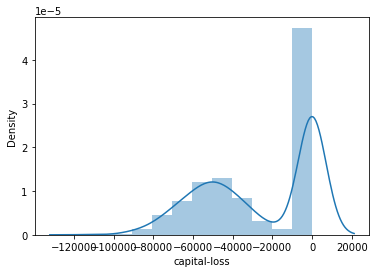

In [406]:
sns.distplot(d["capital-loss"])

# Data cleaning

In [407]:
d['policy_bind_date']=d['policy_bind_date'].astype("datetime64[ns]")


In [408]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [409]:
d["policy_bind_day"] = pd.to_datetime(d.policy_bind_date, format="%d/%m/%Y").dt.day
d["policy_bind_month"] = pd.to_datetime(d.policy_bind_date, format="%d/%m/%Y").dt.month
d["policy_bind_year"] = pd.to_datetime(d.policy_bind_date, format="%d/%m/%Y").dt.year

In [410]:
d.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


In [411]:
d=d.drop(["policy_bind_date",'policy_number'],axis=1)
d.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


In [412]:
def print_unique_col_values(d):
       for column in d:
            if d[column].dtypes=='object':
                print(f'{column}: {d[column].unique()}')

print_unique_col_values(d)

policy_state: ['OH' 'IN' 'IL']
policy_csl: ['250/500' '100/300' '500/1000']
insured_sex: ['MALE' 'FEMALE']
insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies: ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_date: ['25-01-2015' '21-01-2015' '22-02-2015' '10-01-2015' '17-02-2015'
 '02-01-2015' '13-01-2015' '27-02-2015' '30-01-2015' '05-01-2015'
 '06-01-2015' '15-02-2015' '22-01-2015' '08-01-2015' '15-

In [413]:
d['policy_state'].replace({'OH':0,'IN':1,"IL":2},inplace=True)
d['policy_csl'].replace({'250/500':0, '100/300':1, '500/1000':2},inplace=True)
d['insured_sex'].replace({'MALE':0 ,'FEMALE':1},inplace=True)

d["property_damage"].replace({"YES":0,"NO":1,"?":2},inplace=True)
d["police_report_available"].replace({"YES":0,"NO":1,"?":2},inplace=True)

d['fraud_reported'].replace({"Y":0,"N":1},inplace=True)

In [414]:
d.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,0,0,1000,1406.91,0,466132,0,MD,...,6510,13020,52080,Saab,92x,2004,0,17,10,2014
1,228,42,1,0,2000,1197.22,5000000,468176,0,MD,...,780,780,3510,Mercedes,E400,2007,0,27,6,2006
2,134,29,0,1,2000,1413.14,5000000,430632,1,PhD,...,7700,3850,23100,Dodge,RAM,2007,1,9,6,2000
3,256,41,2,0,2000,1415.74,6000000,608117,1,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,0,25,5,1990
4,228,44,2,2,1000,1583.91,6000000,610706,0,Associate,...,1300,650,4550,Accura,RSX,2009,1,6,6,2014


In [415]:
insured_education_level = d[["insured_education_level"]]
insured_education_level = pd.get_dummies(insured_education_level, drop_first= True)

insured_education_level.head()

,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [416]:
insured_occupation = d[["insured_occupation"]]
insured_occupation = pd.get_dummies(insured_occupation, drop_first= True)

insured_occupation.head()

,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


In [417]:
insured_relationship = d[["insured_relationship"]]
insured_relationship = pd.get_dummies(insured_relationship, drop_first= True)

insured_relationship.head()

,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [418]:
d['incident_date']=d['incident_date'].astype("datetime64[ns]")

d["incident_day"] = pd.to_datetime(d.incident_date, format="%d/%m/%Y").dt.day
d["incident_month"] = pd.to_datetime(d.incident_date, format="%d/%m/%Y").dt.month
d["incident_year"] = pd.to_datetime(d.incident_date, format="%d/%m/%Y").dt.year

In [419]:
d.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,0,0,1000,1406.91,0,466132,0,MD,...,Saab,92x,2004,0,17,10,2014,25,1,2015
1,228,42,1,0,2000,1197.22,5000000,468176,0,MD,...,Mercedes,E400,2007,0,27,6,2006,21,1,2015
2,134,29,0,1,2000,1413.14,5000000,430632,1,PhD,...,Dodge,RAM,2007,1,9,6,2000,22,2,2015
3,256,41,2,0,2000,1415.74,6000000,608117,1,PhD,...,Chevrolet,Tahoe,2014,0,25,5,1990,1,10,2015
4,228,44,2,2,1000,1583.91,6000000,610706,0,Associate,...,Accura,RSX,2009,1,6,6,2014,17,2,2015


In [420]:
incident_type = d[["incident_type"]]
incident_type = pd.get_dummies(incident_type, drop_first= True)

incident_type.head()

,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,0,1,0
1,0,0,1
2,0,0,0
3,0,1,0
4,0,0,1


In [421]:
incident_severity = d[["incident_severity"]]
incident_severity = pd.get_dummies(incident_severity, drop_first= True)

incident_severity.head()

,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,1,0,0


In [422]:
authorities_contacted = d[["authorities_contacted"]]
authorities_contacted = pd.get_dummies(authorities_contacted, drop_first= True)

authorities_contacted.head()

,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [423]:
incident_state = d[["incident_state"]]
incident_state = pd.get_dummies(incident_state, drop_first= True)

incident_state.head()

,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [424]:
incident_city = d[["incident_city"]]
incident_city = pd.get_dummies(incident_city, drop_first= True)

incident_city.head()

,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [425]:
auto_make = d[["auto_make"]]
auto_make = pd.get_dummies(auto_make, drop_first= True)

auto_make.head()

,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [426]:
auto_model = d[["auto_model"]]
auto_model = pd.get_dummies(auto_model, drop_first= True)

auto_model.head()

,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [427]:
d=d.drop(["insured_hobbies","collision_type","incident_location"],axis=1)
d.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,0,0,1000,1406.91,0,466132,0,MD,...,Saab,92x,2004,0,17,10,2014,25,1,2015
1,228,42,1,0,2000,1197.22,5000000,468176,0,MD,...,Mercedes,E400,2007,0,27,6,2006,21,1,2015
2,134,29,0,1,2000,1413.14,5000000,430632,1,PhD,...,Dodge,RAM,2007,1,9,6,2000,22,2,2015
3,256,41,2,0,2000,1415.74,6000000,608117,1,PhD,...,Chevrolet,Tahoe,2014,0,25,5,1990,1,10,2015
4,228,44,2,2,1000,1583.91,6000000,610706,0,Associate,...,Accura,RSX,2009,1,6,6,2014,17,2,2015


In [428]:
d = pd.concat([d,insured_education_level,insured_occupation,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model ], axis = 1)

In [429]:
d.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,0,0,1000,1406.91,0,466132,0,MD,...,0,0,0,0,0,0,0,0,0,0
1,228,42,1,0,2000,1197.22,5000000,468176,0,MD,...,0,0,0,0,0,0,0,0,0,0
2,134,29,0,1,2000,1413.14,5000000,430632,1,PhD,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2,0,2000,1415.74,6000000,608117,1,PhD,...,0,0,0,0,0,1,0,0,0,0
4,228,44,2,2,1000,1583.91,6000000,610706,0,Associate,...,0,0,1,0,0,0,0,0,0,0


In [430]:
d=d.drop(["insured_education_level","incident_date","insured_occupation","insured_relationship","incident_type","incident_severity","authorities_contacted","incident_state","incident_city","auto_make","auto_model"],axis=1)

In [431]:
d.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,0,0,1000,1406.91,0,466132,0,53300,...,0,0,0,0,0,0,0,0,0,0
1,228,42,1,0,2000,1197.22,5000000,468176,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,0,1,2000,1413.14,5000000,430632,1,35100,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2,0,2000,1415.74,6000000,608117,1,48900,...,0,0,0,0,0,1,0,0,0,0
4,228,44,2,2,1000,1583.91,6000000,610706,0,66000,...,0,0,1,0,0,0,0,0,0,0


In [432]:
d.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'capital-gains',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=126)

In [433]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 126 entries, months_as_customer to auto_model_X6
dtypes: float64(1), int64(28), uint8(97)
memory usage: 321.4 KB


In [434]:
d.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,0.98600,0.949000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.537000,25126.100000,...,0.031000,0.043000,0.01200,0.022000,0.02000,0.024000,0.023000,0.04200,0.023000,0.016000
std,115.113174,9.140287,0.83096,0.805635,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,27872.187708,...,0.173404,0.202959,0.10894,0.146757,0.14007,0.153126,0.149978,0.20069,0.149978,0.125538
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,51025.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,100500.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [435]:
d.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
months_as_customer,1.000000,0.922098,0.000328,-0.008876,0.026807,0.005018,0.015498,0.017895,-0.060925,0.006399,...,-0.037639,0.001113,-0.000036,-0.021153,0.005893,0.048503,-0.014724,0.016722,-0.025740,0.006562
age,0.922098,1.000000,0.014533,-0.009876,0.029188,0.014404,0.018126,0.025604,-0.073337,-0.007075,...,-0.045717,-0.006887,-0.004399,-0.006609,-0.003096,0.040229,-0.016652,0.024111,0.001604,0.019046
policy_state,0.000328,0.014533,1.000000,0.028838,-0.010033,-0.012455,0.029580,-0.008777,-0.020481,-0.074551,...,0.023856,0.033250,-0.009200,-0.030305,-0.006192,0.026244,-0.029542,0.039544,0.026682,0.078916
policy_csl,-0.008876,-0.009876,0.028838,1.000000,0.003931,-0.003813,-0.015602,-0.005428,0.070700,-0.001635,...,-0.038829,0.037913,-0.004425,0.026432,0.035660,-0.046868,0.051140,0.025644,-0.048274,-0.061206
policy_deductable,0.026807,0.029188,-0.010033,0.003931,1.000000,-0.003245,0.010870,0.004545,0.009733,0.035212,...,-0.002038,0.009286,-0.017000,-0.016632,-0.055128,0.013205,-0.001396,0.018651,0.025874,-0.034873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
auto_model_Tahoe,0.048503,0.040229,0.026244,-0.046868,0.013205,0.010893,0.015866,0.049023,0.014571,0.036605,...,-0.028048,-0.033240,-0.017282,-0.023519,-0.022402,1.000000,-0.024060,-0.032834,-0.024060,-0.019996
auto_model_Ultima,-0.014724,-0.016652,-0.029542,0.051140,-0.001396,-0.017260,-0.003844,0.033828,0.035440,0.001269,...,-0.027443,-0.032523,-0.016909,-0.023012,-0.021919,-0.024060,1.000000,-0.032126,-0.023541,-0.019565
auto_model_Wrangler,0.016722,0.024111,0.039544,0.025644,0.018651,0.027322,0.010330,-0.007474,-0.025535,-0.008517,...,-0.037451,-0.044383,-0.023076,-0.031404,-0.029912,-0.032834,-0.032126,1.000000,-0.032126,-0.026700
auto_model_X5,-0.025740,0.001604,0.026682,-0.048274,0.025874,-0.012346,-0.027085,-0.070033,-0.018075,0.037212,...,-0.027443,-0.032523,-0.016909,-0.023012,-0.021919,-0.024060,-0.023541,-0.032126,1.000000,-0.019565


array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_state'}>],
       [<AxesSubplot:title={'center':'policy_csl'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'insured_sex'}>],
       [<AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>],
       [<AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'property_damage'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'police_report_available'}>,
        <

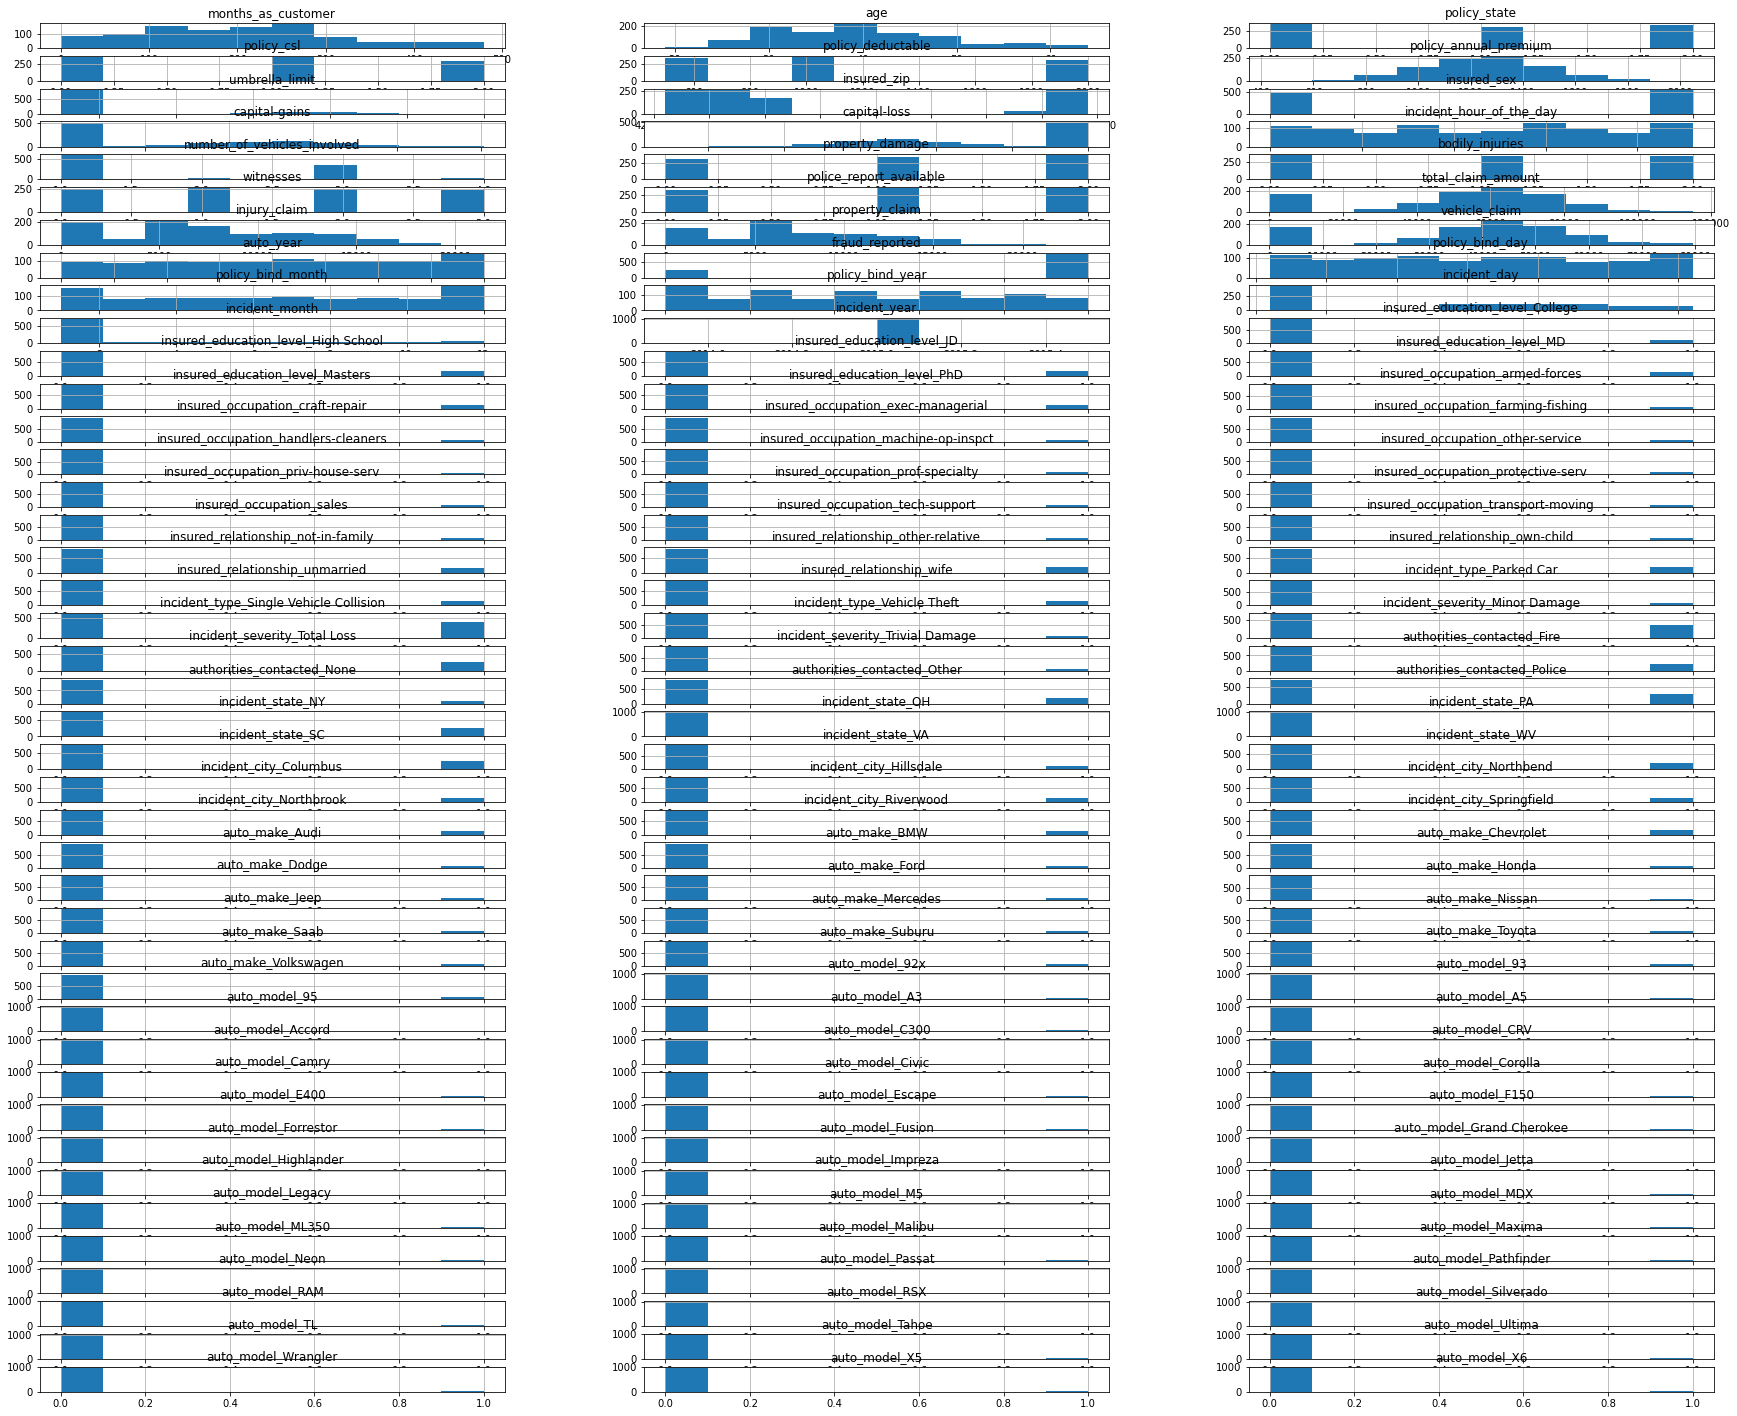

In [436]:
d.hist(figsize=(30,30), layout=(50,3), sharex=False)

# Plotting and checking outliers

months_as_customer        AxesSubplot(0.125,0.867375;0.227941x0.0126254)
age                    AxesSubplot(0.398529,0.867375;0.227941x0.0126254)
policy_state           AxesSubplot(0.672059,0.867375;0.227941x0.0126254)
policy_csl                AxesSubplot(0.125,0.852224;0.227941x0.0126254)
policy_deductable      AxesSubplot(0.398529,0.852224;0.227941x0.0126254)
                                             ...                        
auto_model_Tahoe       AxesSubplot(0.398529,0.261355;0.227941x0.0126254)
auto_model_Ultima      AxesSubplot(0.672059,0.261355;0.227941x0.0126254)
auto_model_Wrangler       AxesSubplot(0.125,0.246204;0.227941x0.0126254)
auto_model_X5          AxesSubplot(0.398529,0.246204;0.227941x0.0126254)
auto_model_X6          AxesSubplot(0.672059,0.246204;0.227941x0.0126254)
Length: 126, dtype: object

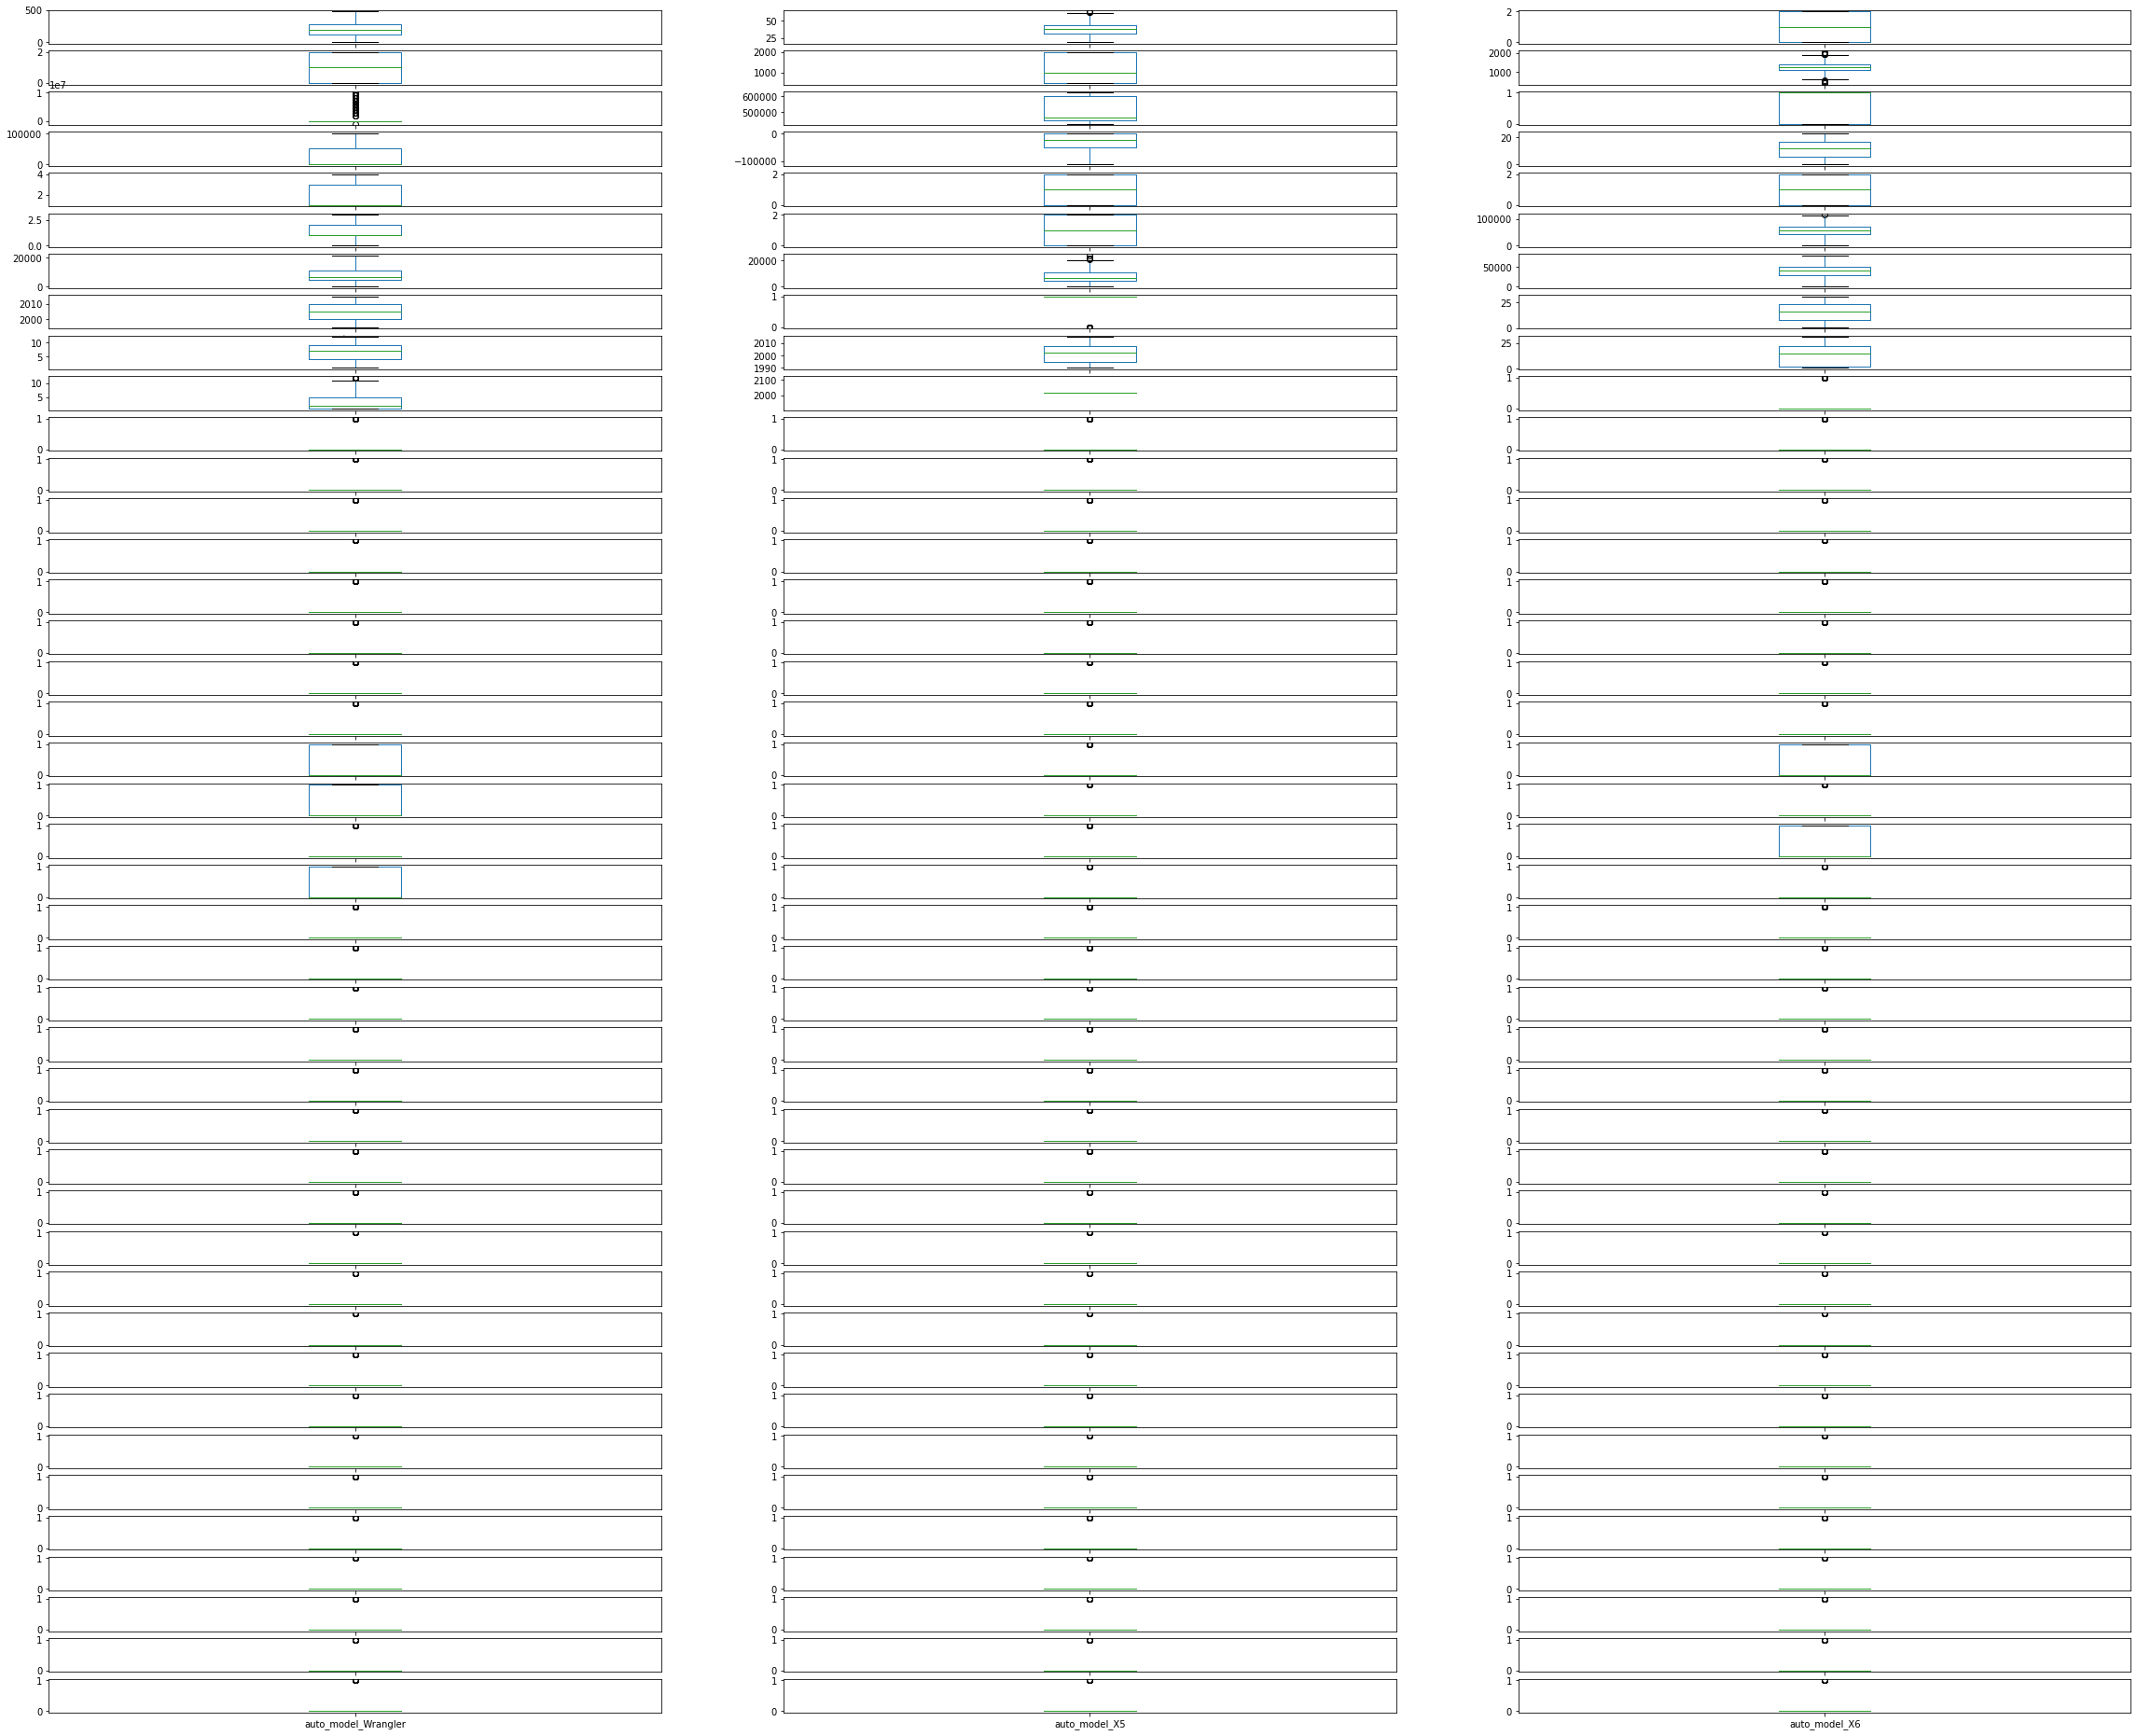

In [437]:
d.plot(kind="box",subplots=True,layout=(50,3),figsize=(40,40))

In [438]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[1.07813958, 0.99083647, 1.18717314, ..., 0.20938323, 0.15343224,
        0.12751534],
       [0.2089946 , 0.33407345, 0.01685641, ..., 0.20938323, 0.15343224,
        0.12751534],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.20938323, 0.15343224,
        0.12751534],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 0.20938323, 0.15343224,
        0.12751534],
       [2.20802805, 2.52328351, 1.22088596, ..., 0.20938323, 0.15343224,
        0.12751534],
       [2.19064515, 2.3043625 , 1.18717314, ..., 0.20938323, 0.15343224,
        0.12751534]])

In [439]:
d2=d[(z<3).all(axis=1)]
d2

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6


In [440]:
x=d.drop(["fraud_reported"],axis=1)
y=d["fraud_reported"]

# Testing on various models

In [441]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


In [442]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()

In [443]:
model=[lg,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is
0.7212121212121212
[[  0  88]
 [  4 238]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.73      0.98      0.84       242

    accuracy                           0.72       330
   macro avg       0.37      0.49      0.42       330
weighted avg       0.54      0.72      0.61       330



Accuracy score of DecisionTreeClassifier() is
0.6696969696969697
[[ 25  63]
 [ 46 196]]
              precision    recall  f1-score   support

           0       0.35      0.28      0.31        88
           1       0.76      0.81      0.78       242

    accuracy                           0.67       330
   macro avg       0.55      0.55      0.55       330
weighted avg       0.65      0.67      0.66       330



Accuracy score of SVC() is
0.7303030303030303
[[  0  88]
 [  1 241]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00   

we will use svc model for prediction

In [444]:
#predicting the value
pred=svc.predict(x_test)
print("fraud_reported",pred)

fraud_reported [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [445]:
dfr1=pd.DataFrame({"Actual fraud":y_test,"Predicted fraud":pred})
dfr1

,Actual fraud,Predicted fraud
521,1,1
737,1,1
740,1,1
660,1,1
411,1,1
...,...,...
506,1,1
342,0,1
485,1,1
711,1,1
